In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from IPython.display import clear_output
%matplotlib notebook

<IPython.core.display.Javascript object>


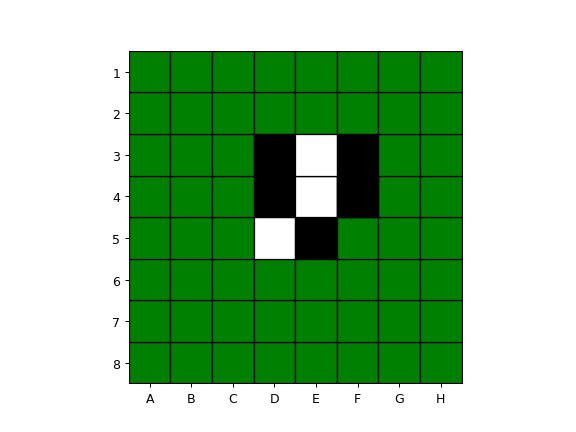

In [2]:


def crear_tablero():
    fig, ax = plt.subplots()
    ax.set_xlim(0, 8)
    ax.set_ylim(0, 8)
    ax.set_aspect('equal')
    ax.set_xticks(np.arange(0.5, 8.5, 1))
    ax.set_yticks(np.arange(7.5, -0.5, -1))  # Numeración de arriba hacia abajo
    ax.set_xticklabels(list("ABCDEFGH"))
    ax.set_yticklabels(list("12345678"))

    # Crear el tablero inicialmente verde
    board = np.full((8, 8), 'green')

    # Definir las casillas iniciales blancas y negras
    board[3, 3] = board[4, 4] = 'white'
    board[3, 4] = board[4, 3] = 'black'

    # Dibujar el tablero según el estado
    for i in range(8):
        for j in range(8):
            ax.add_patch(plt.Rectangle((i, j), 1, 1, facecolor=board[j, i], edgecolor='black'))

    return fig, ax, board

current_color = 'white'  # Inicialmente, el color es blanco



def pintar_casilla(event, fig, ax, board):
    global current_color, x, y  # Agregar x e y como globales
    if event.xdata is not None and event.ydata is not None:
        x, y = int(event.xdata), int(event.ydata)  # Actualizar x e y
        color = 'white' if current_color == 'black' else 'black'
        board[y, x] = color  # Actualizar el estado del tablero
        ax.add_patch(plt.Rectangle((x, y), 1, 1, facecolor=color, edgecolor='black'))
        fig.canvas.draw()
        current_color = color  # Cambiar el color
       

fig, ax, board = crear_tablero()
fig.canvas.mpl_connect('button_press_event', lambda event: pintar_casilla(event, fig, ax, board))
plt.show()
